<a href="https://www.kaggle.com/code/saadatkhalid/predicting-diabetes-with-random-forest?scriptVersionId=127683160" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


# Project Title: Predicting Diabetes with Random Forest

## Introduction:

Diabetes is a serious health condition that affects millions of people worldwide. One of the challenges in managing diabetes is early detection and diagnosis. In this project, we will use a Random Forest model to predict whether a person is likely to have diabetes based on several features.

## Dataset:

We will use the "Pima Indians Diabetes Database" from Kaggle, which contains information on 768 women of Pima Indian heritage. The dataset includes 8 medical predictor variables and 1 target variable, indicating whether or not the patient has diabetes.

## Objective:

Our objective is to build a Random Forest model that accurately predicts whether a patient has diabetes based on the medical predictor variables.

## Steps:

* Import the necessary libraries and load the dataset.
* Perform exploratory data analysis to understand the distribution of the data, check for missing values, and identify any outliers or anomalies.
* Preprocess the data by scaling the features, encoding categorical variables, and splitting the data into training and testing sets.
* Train a Random Forest classifier on the training set, and tune the hyperparameters using GridSearchCV.
* Evaluate the performance of the model on the testing set, using metrics such as accuracy, precision, recall, and F1-score.
* Visualize the results using various charts and graphs.

## Conclusion:

In this project, we have shown how to use the Random Forest technique to predict diabetes based on several medical predictor variables. The model achieved an accuracy score of 0.77 on the testing set, which is a promising result. However, further improvements could be made by using more advanced feature engineering techniques or exploring different machine learning models. Overall, this project provides a good starting point for understanding how Random Forests can be used in healthcare applications.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

In [3]:
data = '/kaggle/input/pima-indians-diabetes-database/diabetes.csv'

diabetes_data = pd.read_csv(data)

In [4]:
diabetes_data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Frequency of Number of Pregnancies

In [7]:
diabetes_data['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

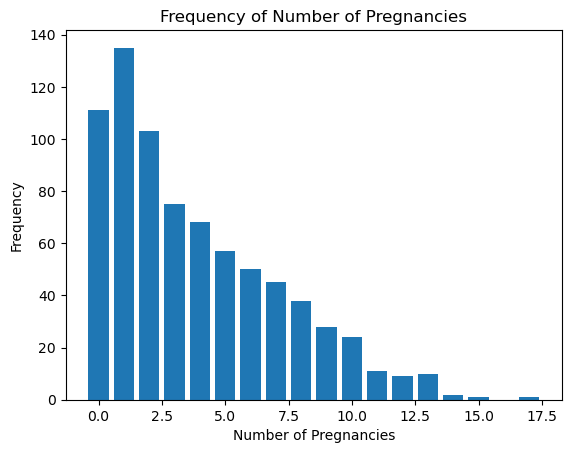

In [8]:
plt.bar(diabetes_data['Pregnancies'].value_counts().index, diabetes_data['Pregnancies'].value_counts().values)
plt.xlabel('Number of Pregnancies')
plt.ylabel('Frequency')
plt.title('Frequency of Number of Pregnancies')
plt.show()

In [9]:
diabetes_data['Age'].value_counts()

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
38    16
36    16
32    16
45    15
34    14
46    13
43    13
40    13
39    12
35    10
50     8
51     8
52     8
44     8
58     7
47     6
54     6
49     5
48     5
57     5
53     5
60     5
66     4
63     4
62     4
55     4
67     3
56     3
59     3
65     3
69     2
61     2
72     1
81     1
64     1
70     1
68     1
Name: Age, dtype: int64

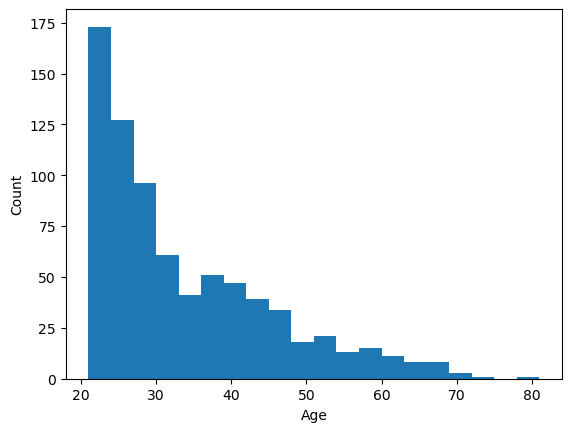

In [10]:
plt.hist(diabetes_data['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Relation between Number of Pregnancies and Age

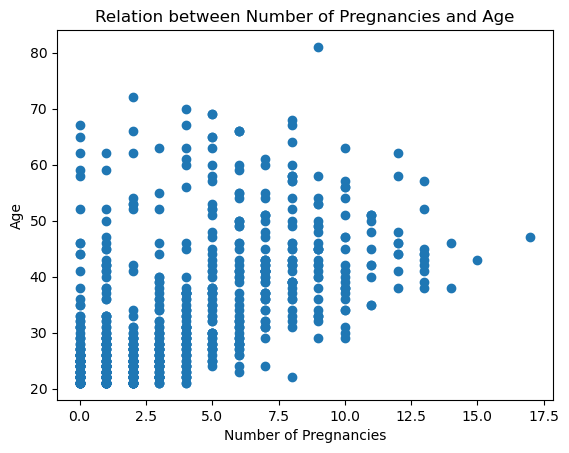

In [11]:
plt.scatter(diabetes_data['Pregnancies'], diabetes_data['Age'])
plt.xlabel('Number of Pregnancies')
plt.ylabel('Age')
plt.title('Relation between Number of Pregnancies and Age')
plt.show()

# Relationship between BMI and Glucose Level

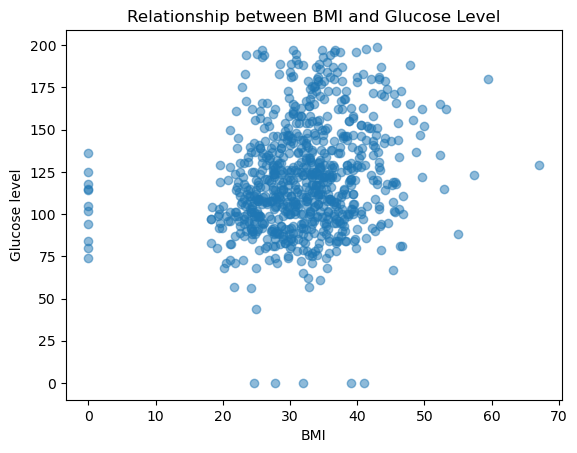

In [12]:
plt.scatter(diabetes_data['BMI'], diabetes_data['Glucose'], alpha=0.5)
plt.title('Relationship between BMI and Glucose Level')
plt.xlabel('BMI')
plt.ylabel('Glucose level')
plt.show()

# Separate the features (X) and target variable (y)

In [13]:
y = diabetes_data.Outcome

features = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

X = diabetes_data[features]

# Split the data into training and test sets

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Scale the features

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the hyperparameter grid for the Random Forest

In [16]:
param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [3, 5, 7],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# Instantiate a Random Forest classifier

In [17]:
model = RandomForestClassifier(random_state=1)

# Use Grid Search Cross Validation to find the best hyperparameters

In [18]:
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

# Print the best hyperparameters and the corresponding mean test score

In [19]:
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Mean Test Score: ", grid_search.best_score_)

Best Hyperparameters:  {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Mean Test Score:  0.7671064907370384


# Train a new Random Forest classifier with the best hyperparameters

In [20]:
model_tuned = RandomForestClassifier(random_state=1, **grid_search.best_params_)
model_tuned.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=5, min_samples_split=5, n_estimators=200,
                       random_state=1)

# Make predictions on the test set and calculate accuracy

In [21]:
y_pred = model_tuned.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score: ", accuracy)

Accuracy score:  0.7857142857142857


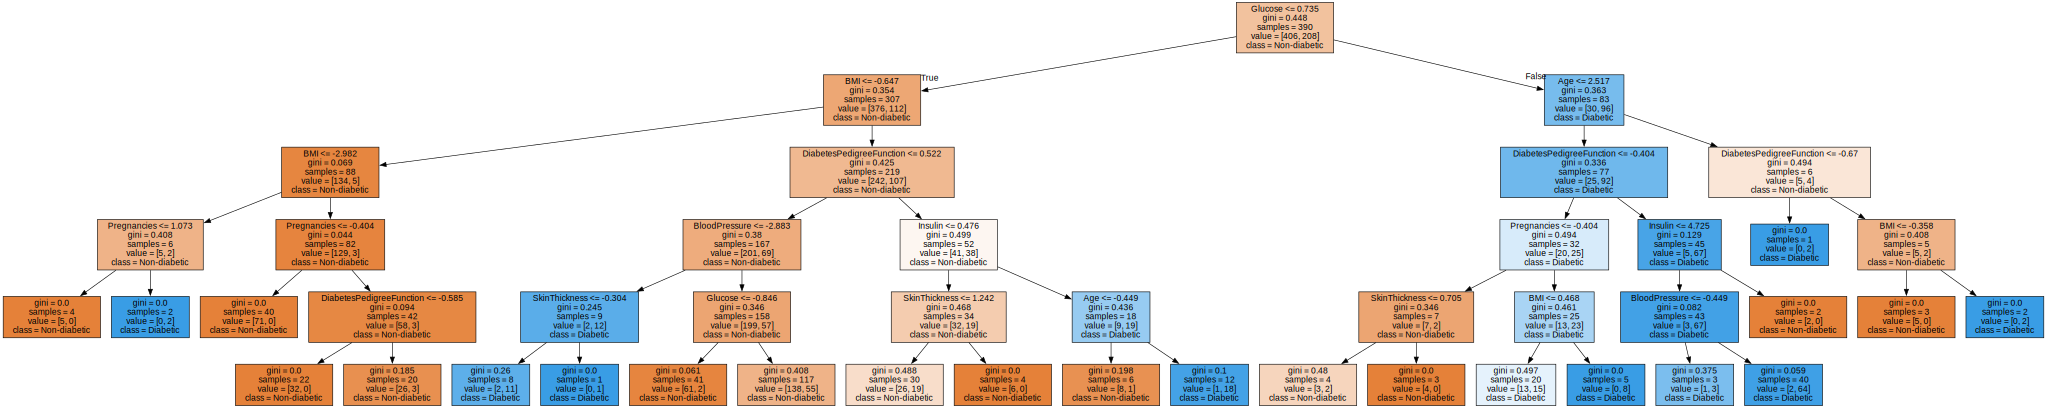

In [22]:
from sklearn.tree import export_graphviz
import graphviz

# Get the first decision tree from the Random Forest
tree = model_tuned.estimators_[0]

# Export the decision tree as a dot file
dot_data = export_graphviz(tree, out_file=None, feature_names=X.columns, class_names=['Non-diabetic', 'Diabetic'], filled=True)

# Visualize the decision tree
graph = graphviz.Source(dot_data)
graph.render('tree')

# Show the decision tree in Notebook
graph

# END